# Distance from parallax
from https://arxiv.org/pdf/1507.02105.pdf


# Libraries 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import emcee

# Model

"For a star at true distance $r$, its true but unknown parallax is $1/r$. The measured parallax, $\varpi$, is a noisy measurement of $1/r$. We assume that $\varpi$ is normally distributed with unknown mean $1/r$ and known standard deviation $\sigma_\varpi$."

$$ P(\varpi|r,\sigma)=\frac{1}{\sqrt{2\pi\sigma_\varpi^2}} \exp{\left[-\frac{1}{2\sigma_\varpi^2} \left(\varpi-\frac{1}{r}\right)^2 \right]} \: \text{where} \: \sigma_\varpi \geq 0$$

a Gaussian likelihood

In [2]:
def log_likelihood(data,model):
    r = model
    varpi_model = 1/r
    varpi, sigma = data
    return -0.5 * ( np.log(2 * np.pi * sigma ** 2) + (varpi - varpi_model) ** 2 / sigma ** 2 )

with flat cutoff prior
\begin{align} P_u(r) =
    \begin{cases}
      1/r_{lim} &,  r\in ]0,r_{lim}[ \\
      0 &, \text{otherwise}
    \end{cases}
\end{align}

In [3]:
def log_prior(model):
    r = model
    if r<0 or r>1000:
        return -np.inf  # log(0)
    else:
        return -np.log(r)

the posterior 
$$ P(r|\varpi,\sigma)=P(\varpi|r,\sigma)P_u(r)$$

to define the log posterior function requires by emcee



In [4]:
def log_posterior(model, data):
    return log_prior(model) + log_likelihood(data,model)

in fact a fake use of emcee, the posterior is analitic ;-)

one should better use $f=\varpi/\sigma$ and $f_{true}=1/r\sigma$, good sources are the ones with $f>5$

$$ P(f|f_{true})=\frac{1}{\sqrt{2\pi}} \exp{\left[-\frac{\left(f-f_{true}\right)^2}{2}  \right]} $$

## varpi / sigma = 5

a simulated source [in mas]

In [5]:
varpi = 0.5
sigma = 0.1
data = varpi, sigma

In [6]:
data

(0.5, 0.1)

MCMC sampler parameters :
* dimension of the model : ndim 
* number of walkers : k > 2 ndim
* number of steps : large enough in order that the chain is stabilised

In [7]:
ndim = 1  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nsteps = 2000  # number of MCMC steps to take

In [8]:
# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

Here's the function call where all the work happens:
 we'll time it using IPython's %time magic



In [9]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

CPU times: user 1.9 s, sys: 7.48 ms, total: 1.91 s
Wall time: 1.91 s
done


check the shape of the sampler chain 

In [10]:
sampler.chain.shape

(50, 2000, 1)

set "burn-in" period to 1000, one assume that the chain is stable after 1000 steps

In [11]:
nburn = 1000 

stack all the walkers

In [12]:
trace = sampler.chain[:, nburn:, :].reshape(-1, ndim).T

In [13]:
trace.shape

(1, 50000)

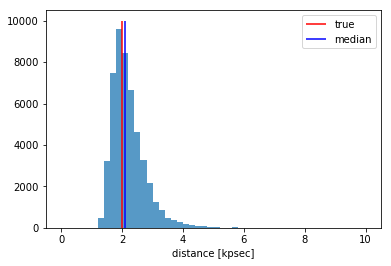

In [14]:
plt.hist(trace[0],bins=50,range=(0,10),alpha=0.75);
plt.vlines(1/varpi,ymin=0,ymax=10000,color='r',label='true')
plt.vlines(np.median(trace[0]),ymin=0,ymax=10000,color='b',label='median')
plt.xlabel('distance [kpsec]')
plt.legend()

## varpi / sigma = 1

In [15]:
varpi = 0.1
sigma = 0.1
data = varpi, sigma

In [16]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

CPU times: user 1.82 s, sys: 5.71 ms, total: 1.83 s
Wall time: 1.83 s
done


In [17]:
trace = sampler.chain[:, nburn:, :].reshape(-1, ndim).T

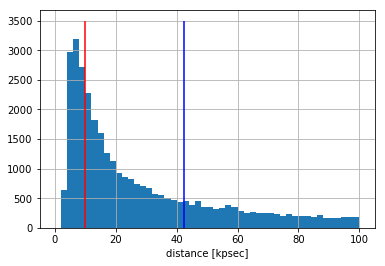

In [18]:
plt.hist(trace[0],bins=50,range=(0,100));
plt.vlines(1/varpi,ymin=0,ymax=3500,color='r')
plt.vlines(np.median(trace[0]),ymin=0,ymax=3500,color='b')
plt.xlabel('distance [kpsec]')
plt.grid()

## varpi / sigma = 0.2

In [19]:
varpi = 0.02
sigma = 0.1
data = varpi, sigma

In [20]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

CPU times: user 1.86 s, sys: 23.8 ms, total: 1.89 s
Wall time: 1.83 s
done


In [21]:
trace = sampler.chain[:, nburn:, :].reshape(-1, ndim).T

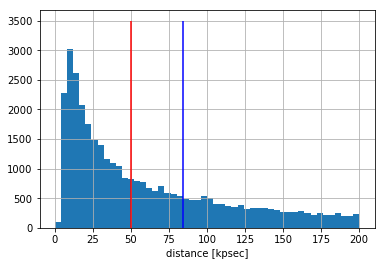

In [22]:
plt.hist(trace[0],bins=50,range=(0,200));
plt.vlines(1/varpi,ymin=0,ymax=3500,color='r')
plt.vlines(np.median(trace[0]),ymin=0,ymax=3500,color='b')
plt.xlabel('distance [kpsec]')
plt.grid()